In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import matplotlib.pyplot as plt
import halma as h
import numpy as np
import game_tree as g
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



In [16]:
game = h.Halma(h.get_board())
moves = game.get_available_moves(1)


40


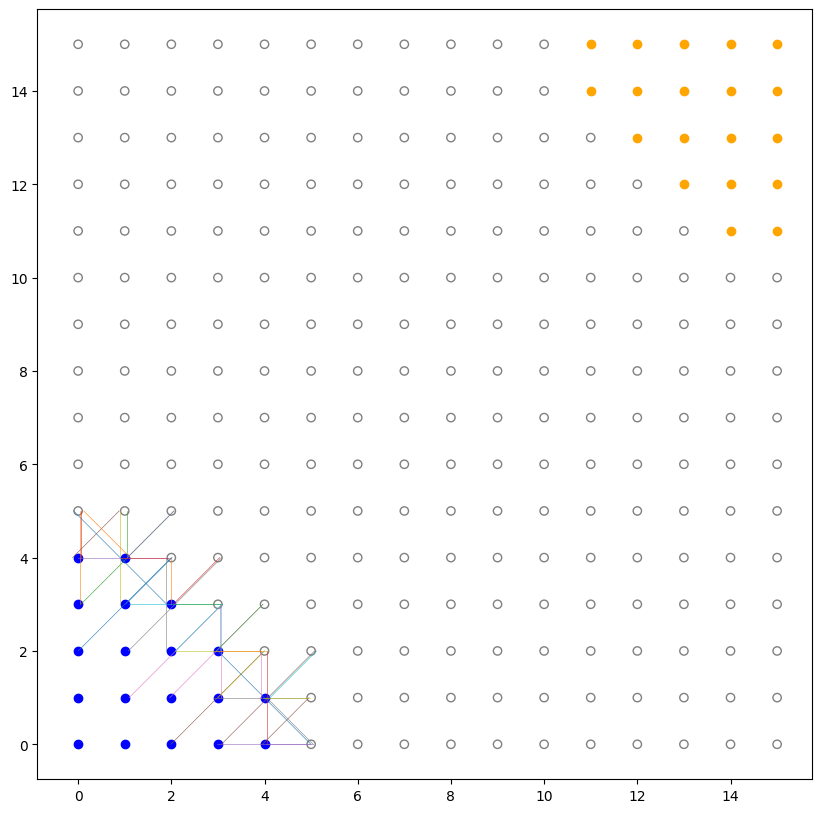

In [17]:
import random
def draw_board(board, alpha=1):
    for i in range(len(board)):
        for j, v in enumerate(board[i]):
            if v == 0:
                plt.scatter(i,j, facecolors='none', color = 'gray', alpha=alpha)
            elif v == 1:
                plt.scatter(i,j,  color = 'blue', alpha=alpha)
            else:
                plt.scatter(i,j,  color = 'orange', alpha=alpha)

def draw_moves(moves):
    for move in moves:
        xs, ys = move.src 
        xd, yd = move.dest
        offset = (random.random() - 0.5)/4
        plt.plot([xs+offset, xd+offset], [ys, yd], linewidth=0.4)
plt.figure(figsize=(10,10))
draw_board(game.board)

draw_moves(moves)
print(len(moves))

In [18]:
halma = h.Halma(h.get_board())
gt = g.GameTree(halma)
boards = gt.play(max_count=50)


Function minmax [1, False] {} Took 0.0061 seconds
Function minmax [1, False] {} Took 0.0054 seconds
Function minmax [1, False] {} Took 0.0053 seconds
Function minmax [1, False] {} Took 0.0065 seconds
Function minmax [1, False] {} Took 0.0045 seconds
Function minmax [1, False] {} Took 0.0047 seconds
Function minmax [1, False] {} Took 0.0057 seconds
Function minmax [1, False] {} Took 0.0045 seconds
Function minmax [1, False] {} Took 0.0046 seconds
Function minmax [1, False] {} Took 0.0046 seconds
Function minmax [1, False] {} Took 0.0058 seconds
Function minmax [1, False] {} Took 0.0050 seconds
Function minmax [1, False] {} Took 0.0050 seconds
Function minmax [1, False] {} Took 0.0075 seconds
Function minmax [1, False] {} Took 0.0046 seconds
Function minmax [1, False] {} Took 0.0046 seconds
Function minmax [1, False] {} Took 0.0056 seconds
Function minmax [1, False] {} Took 0.0047 seconds
Function minmax [1, False] {} Took 0.0044 seconds
Function minmax [1, False] {} Took 0.0059 seconds


26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
48/50
49/50


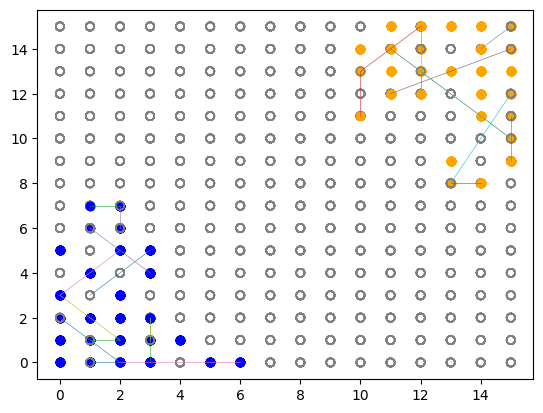